In [14]:
import os
import csv
import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

def get_odd_or_text(td):
    if "data-odd" in td.attrs:
        return td["data-odd"]

    odd = td.select_one("[data-odd]")
    if odd:
        return odd["data-odd"]

    return td.get_text(strip=True) or 0

base_url = "https://www.betexplorer.com/soccer/england/premier-league/-"

all_data = []
url_list = []

for year in range(2002, 2022):
    year_next = year+1
    url = base_url + str(year) + "-" + str(year_next) + "/results/"
    url_list.append(url)

for url in url_list:
    response = requests.get(url)
    if response.status_code == 404:
        continue
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for row in soup.select(".table-main tr:has(td)"):
        tds = [get_odd_or_text(td) if td else 0 for td in row.select("td")]
        round_ = row.find_previous("th").find_previous("tr").th.text
        all_data.append([round_, *tds])
        

df = pd.DataFrame(
    all_data, columns=["Round", "Match", "Score", "1", "X", "2", "Date"])


df['Home'] = [i.split('-')[0] for i in df['Match']]
df['Away'] = [i.split('-')[1] for i in df['Match']]

df['HomeGoals'] = [i.split(':', 1)[0] for i in df['Score']]
df['AwayGoals'] = [i.split(':', 1)[1] for i in df['Score']]
df['Competition'] = "English Premier League"
df.to_csv('C:/Users/paulc/Documents/Football Data project/HistoricalOddsAnalysis/England Premier League.csv',index=False)

<h2> Data exploration

In [208]:
df = pd.read_csv('C:/Users/paulc/Documents/Football Data project/HistoricalOddsAnalysis/datafiles/English Premier League.csv')

In [209]:
df.shape

(8360, 12)

In [210]:
df.head()

,Round,Match,Score,1,X,2,Date,Home,Away,HomeGoals,AwayGoals,Competition
0,38. Round,Charlton-Liverpool,00:04,3.60,3.6,1.70,19.05.2001,Charlton,Liverpool,0,4,English Premier League
1,38. Round,Coventry-Bradford City,00:00,1.79,3.3,3.80,19.05.2001,Coventry,Bradford City,0,0,English Premier League
2,38. Round,Derby-Ipswich,01:01,3.50,3.3,1.96,19.05.2001,Derby,Ipswich,1,1,English Premier League
3,38. Round,Everton-Sunderland,02:02,2.50,3.1,2.50,19.05.2001,Everton,Sunderland,2,2,English Premier League
4,38. Round,Leeds-Leicester,03:01,1.27,4.5,9.99,19.05.2001,Leeds,Leicester,3,1,English Premier League


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Round        8360 non-null   object 
 1   Match        8360 non-null   object 
 2   Score        8360 non-null   object 
 3   1            8353 non-null   float64
 4   X            8351 non-null   float64
 5   2            8351 non-null   float64
 6   Date         8360 non-null   object 
 7   Home         8360 non-null   object 
 8   Away         8360 non-null   object 
 9   HomeGoals    8360 non-null   int64  
 10  AwayGoals    8360 non-null   int64  
 11  Competition  8360 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 783.9+ KB


In [212]:
df['Date'] = pd.to_datetime(df.Date)
df = df[['Date','Competition','Home','Away','HomeGoals','AwayGoals','1','X','2']]

df.tail(20)

,Date,Competition,Home,Away,HomeGoals,AwayGoals,1,X,2
8340,2021-08-23,English Premier League,West Ham,Leicester,4,1,2.46,3.46,2.90
8341,2021-08-22,English Premier League,Arsenal,Chelsea,0,2,4.55,3.54,1.86
8342,2021-08-22,English Premier League,Southampton,Manchester Utd,1,1,5.43,4.30,1.61
8343,2021-08-22,English Premier League,Wolves,Tottenham,0,1,2.94,3.07,2.68
8344,2021-08-21,English Premier League,Aston Villa,Newcastle,2,0,1.83,3.90,4.20
8345,2021-08-21,English Premier League,Brighton,Watford,2,0,1.74,3.58,5.39
8346,2021-08-21,English Premier League,Crystal Palace,Brentford,0,0,2.66,3.16,2.88
8347,2021-08-21,English Premier League,Leeds,Everton,2,2,2.12,3.50,3.55
8348,2021-08-21,English Premier League,Liverpool,Burnley,2,0,1.24,6.60,12.15
8349,2021-08-21,English Premier League,Manchester City,Norwich,5,0,1.12,10.08,23.00


In [213]:
def Home_win(df):
    if df.HomeGoals > df.AwayGoals:
        return 1
    else:
        return 0

def Away_win(df):
    if df.HomeGoals < df.AwayGoals:
        return 1
    else:
        return 0

def draw(df):
    if df.HomeGoals == df.AwayGoals:
        return 1
    else:
        return 0


In [214]:
df['HomeWin'] = df.apply(Home_win,axis=1)
df['AwayWin'] = df.apply(Away_win,axis=1)
df['Draw'] = df.apply(draw,axis=1)
df

,Date,Competition,Home,Away,HomeGoals,AwayGoals,1,X,2,HomeWin,AwayWin,Draw
0,2001-05-19,English Premier League,Charlton,Liverpool,0,4,3.60,3.60,1.70,0,1,0
1,2001-05-19,English Premier League,Coventry,Bradford City,0,0,1.79,3.30,3.80,0,0,1
2,2001-05-19,English Premier League,Derby,Ipswich,1,1,3.50,3.30,1.96,0,0,1
3,2001-05-19,English Premier League,Everton,Sunderland,2,2,2.50,3.10,2.50,0,0,1
4,2001-05-19,English Premier League,Leeds,Leicester,3,1,1.27,4.50,9.99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8355,2021-08-14,English Premier League,Leicester,Wolves,1,0,1.74,3.73,5.06,1,0,0
8356,2021-08-14,English Premier League,Manchester Utd,Leeds,5,1,1.64,4.19,5.21,1,0,0
8357,2021-08-14,English Premier League,Norwich,Liverpool,0,3,6.75,4.85,1.46,0,1,0
8358,2021-08-14,English Premier League,Watford,Aston Villa,3,2,3.51,3.30,2.21,1,0,0


In [215]:
def home_bins(df):
    if 1.01 <= df['1'] < 1.31:
       return '1.01-1.3'
    elif 1.31 <= df['1'] <= 1.5:
       return '1.31-1.5'
    elif 1.51 <= df['1'] <= 1.8:
       return '1.51-1.8'
    elif 1.81 <= df['1'] <= 2:
       return '1.81-2.0'
    elif 2.01 <= df['1'] <= 2.6:
       return '2.01-2.6'
    else:
        return 'Outsider'

def away_bins(df):
    if 1.01 <= df['2'] < 1.31:
       return '1.01-1.3'
    elif 1.31 <= df['2'] <= 1.5:
       return '1.31-1.5'
    elif 1.51 <= df['2'] <= 1.8:
       return '1.51-1.8'
    elif 1.81 <= df['2'] <= 2:
       return '1.81-2.0'
    elif 2.01 <= df['2'] <= 2.6:
       return '2.01-2.6'
    else:
        return 'Outsider'

In [216]:
df['HomeBins'] = df.apply(home_bins,axis=1)
df['AwayBins'] = df.apply(away_bins,axis=1)

In [217]:
df

,Date,Competition,Home,Away,HomeGoals,AwayGoals,1,X,2,HomeWin,AwayWin,Draw,HomeBins,AwayBins
0,2001-05-19,English Premier League,Charlton,Liverpool,0,4,3.60,3.60,1.70,0,1,0,Outsider,1.51-1.8
1,2001-05-19,English Premier League,Coventry,Bradford City,0,0,1.79,3.30,3.80,0,0,1,1.51-1.8,Outsider
2,2001-05-19,English Premier League,Derby,Ipswich,1,1,3.50,3.30,1.96,0,0,1,Outsider,1.81-2.0
3,2001-05-19,English Premier League,Everton,Sunderland,2,2,2.50,3.10,2.50,0,0,1,2.01-2.6,2.01-2.6
4,2001-05-19,English Premier League,Leeds,Leicester,3,1,1.27,4.50,9.99,1,0,0,1.01-1.3,Outsider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,2021-08-14,English Premier League,Leicester,Wolves,1,0,1.74,3.73,5.06,1,0,0,1.51-1.8,Outsider
8356,2021-08-14,English Premier League,Manchester Utd,Leeds,5,1,1.64,4.19,5.21,1,0,0,1.51-1.8,Outsider
8357,2021-08-14,English Premier League,Norwich,Liverpool,0,3,6.75,4.85,1.46,0,1,0,Outsider,1.31-1.5
8358,2021-08-14,English Premier League,Watford,Aston Villa,3,2,3.51,3.30,2.21,1,0,0,Outsider,2.01-2.6


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

Home_goals = df['HomeGoals'].sum()
Away_goals = df['AwayGoals'].sum()
Home_wins = round(df['HomeWin'].sum() / len(df),2)
draws = round(df['Draw'].sum() / len(df),2)
Away_wins = round(df['AwayWin'].sum() / len(df),2)

In [137]:
Home_wins,draws,Away_wins

(0.46, 0.25, 0.29)

In [139]:
epl_results = {'HomeWins':Home_wins,
               'Draws':draws,
               'AwayWins':Away_wins}

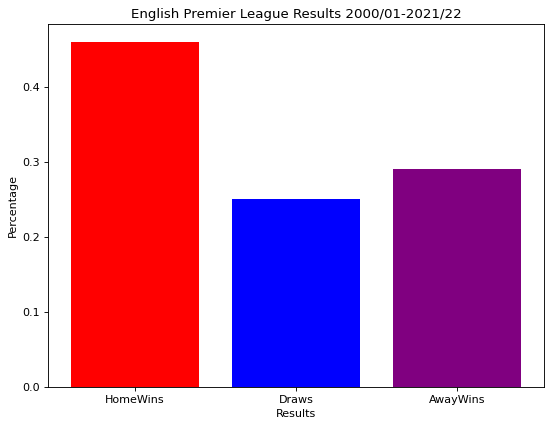

In [153]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

ax = plt.bar(range(len(epl_results)), list(epl_results.values()), align='center',color=['red','blue','purple'])
plt.xticks(range(len(epl_results)), list(epl_results.keys()))
plt.title('English Premier League Results 2000/01-2021/22')
plt.ylabel('Percentage')
plt.xlabel('Results')
plt.xticks(rotation = 0)


plt.show()

In [154]:
epl_totals = {'HomeGoals':Home_goals,
               'AwayGoals':Away_goals}

In [156]:
epl_totals

{'HomeGoals': 12708, 'AwayGoals': 9671}

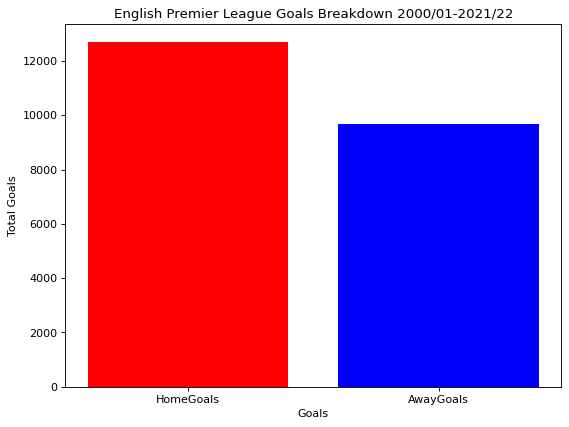

In [155]:
figure(figsize=(8, 6), dpi=80)

ax = plt.bar(range(len(epl_totals)), list(epl_totals.values()), align='center',color=['red','blue'])
plt.xticks(range(len(epl_totals)), list(epl_totals.keys()))
plt.title('English Premier League Goals Breakdown 2000/01-2021/22')
plt.ylabel('Total Goals')
plt.xlabel('Goals')
plt.xticks(rotation = 0)


plt.show()

In [173]:
home_team_goals = df.groupby(['Home']).sum()['HomeGoals'].reset_index().sort_values('HomeGoals',ascending=False)
home_team_goals = home_team_goals.head(10).reset_index(drop=True)
away_team_goals = df.groupby(['Away']).sum()['AwayGoals'].reset_index().sort_values('AwayGoals',ascending=False)
away_team_goals = away_team_goals.head(10).reset_index(drop=True)

In [174]:
away_team_goals

,Away,AwayGoals
0,Manchester Utd,688
1,Liverpool,670
2,Arsenal,669
3,Chelsea,666
4,Manchester City,633
5,Tottenham,565
6,Everton,446
7,Aston Villa,409
8,Newcastle,391
9,West Ham,388


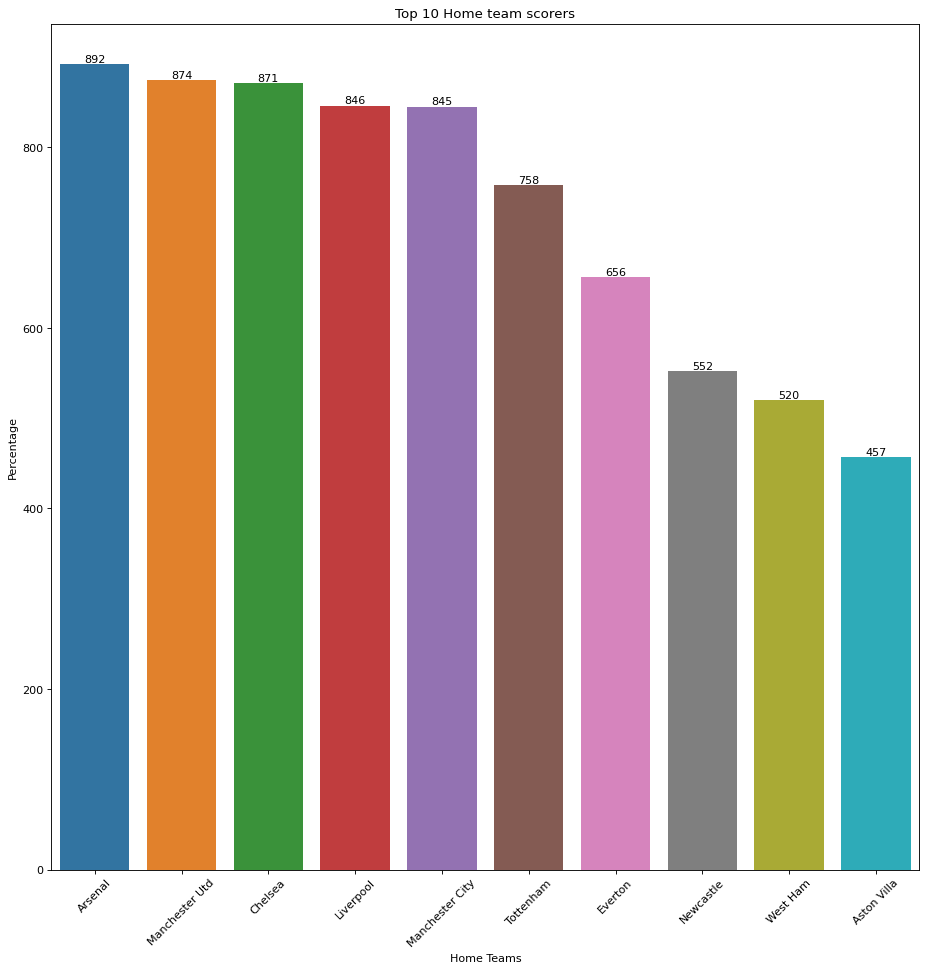

In [176]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(14, 14), dpi=80)
ax = sns.barplot(data=home_team_goals, x="Home", y="HomeGoals",errwidth=0)
plt.title('Top 10 Home team scorers')
plt.ylabel('Percentage')
plt.xlabel('Home Teams')
plt.xticks(rotation = 45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

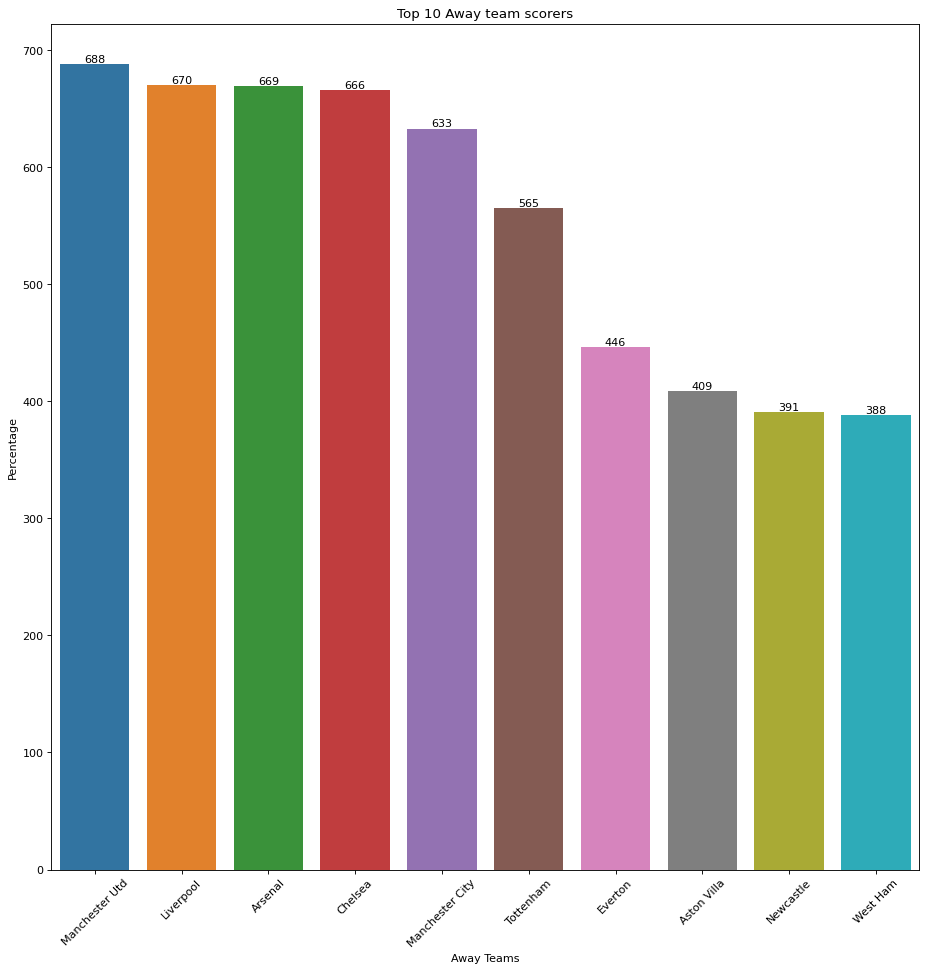

In [177]:

figure(figsize=(14, 14), dpi=80)
ax = sns.barplot(data=away_team_goals, x="Away", y="AwayGoals",errwidth=0)
plt.title('Top 10 Away team scorers')
plt.ylabel('Percentage')
plt.xlabel('Away Teams')
plt.xticks(rotation = 45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [220]:
home_bins = df.groupby(['HomeBins']).sum()['HomeWin'].reset_index().sort_values('HomeWin',ascending=False)
away_bins = df.groupby(['AwayBins']).sum()['AwayWin'].reset_index().sort_values('AwayWin',ascending=False)

In [202]:
home_bins_freq = df.groupby(['HomeBins']).count()['HomeWin'].reset_index().sort_values('HomeWin',ascending=False)
home_bins_freq = pd.concat([home_bins_freq,home_bins],axis=1)
home_bins_freq.columns = ['HomeBins1','TotalHomeBins','HomeBins2','HomeWin']
home_bins_freq['Frequency'] = round(home_bins_freq['HomeWin'] / home_bins_freq['TotalHomeBins'],2)
home_bins_freq

,HomeBins1,TotalHomeBins,HomeBins2,HomeWin,Frequency
5,Outsider,2606,Outsider,641,0.25
4,2.01-2.6,2244,2.01-2.6,924,0.41
2,1.51-1.8,1177,1.51-1.8,728,0.62
3,1.81-2.0,858,1.81-2.0,440,0.51
1,1.31-1.5,768,1.31-1.5,540,0.70
0,1.01-1.3,707,1.01-1.3,563,0.80


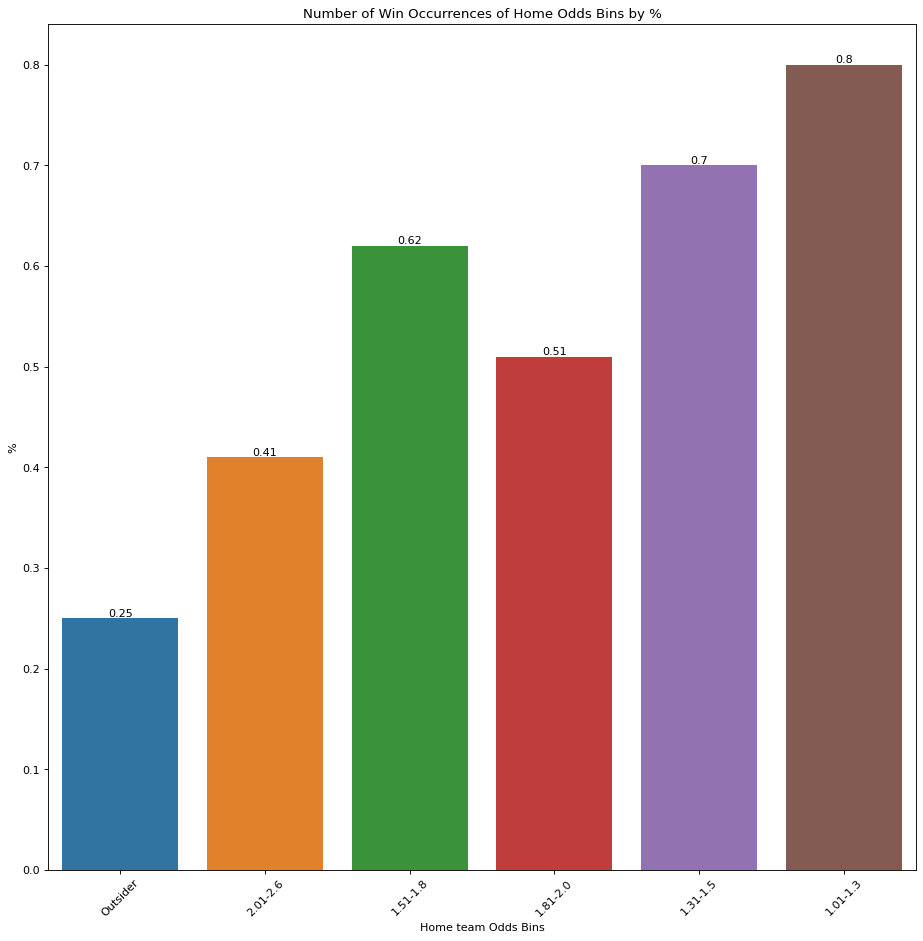

In [204]:
figure(figsize=(14, 14), dpi=80)
ax = sns.barplot(data=home_bins_freq, x="HomeBins1", y='Frequency',errwidth=0)
plt.title('Number of Win Occurrences of Home Odds Bins by %')
plt.ylabel('%')
plt.xlabel('Home team Odds Bins')
plt.xticks(rotation = 45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [221]:
away_bins_freq = df.groupby(['AwayBins']).count()['AwayWin'].reset_index().sort_values('AwayWin',ascending=False)
away_bins_freq = pd.concat([away_bins_freq,away_bins],axis=1)
away_bins_freq.columns = ['AwayBins1','TotalAwayBins','AwayBins2','AwayWin']
away_bins_freq['Frequency'] = round(away_bins_freq['AwayWin'] / away_bins_freq['TotalAwayBins'],2)
away_bins_freq

,AwayBins1,TotalAwayBins,AwayBins2,AwayWin,Frequency
5,Outsider,6003,Outsider,1229,0.20
4,2.01-2.6,1041,2.01-2.6,407,0.39
2,1.51-1.8,660,1.51-1.8,399,0.60
3,1.81-2.0,300,1.81-2.0,146,0.49
1,1.31-1.5,277,1.31-1.5,194,0.70
0,1.01-1.3,79,1.01-1.3,65,0.82


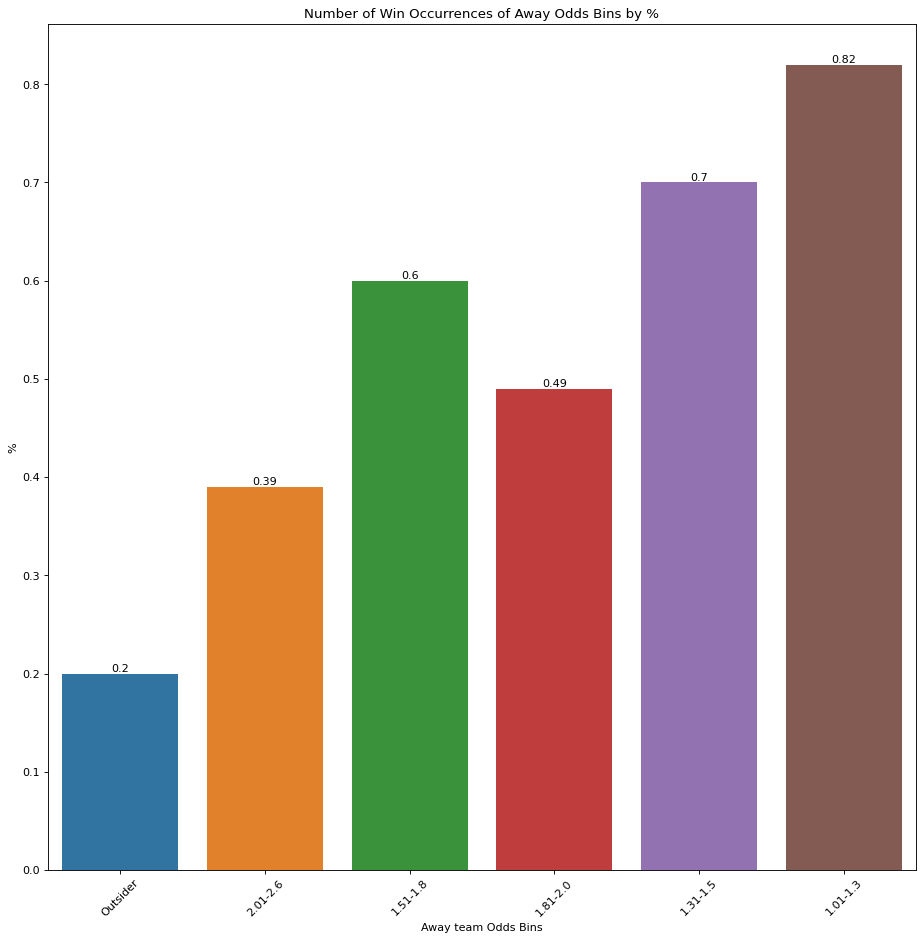

In [222]:
figure(figsize=(14, 14), dpi=80)
ax = sns.barplot(data=away_bins_freq, x="AwayBins1", y='Frequency',errwidth=0)
plt.title('Number of Win Occurrences of Away Odds Bins by %')
plt.ylabel('%')
plt.xlabel('Away team Odds Bins')
plt.xticks(rotation = 45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()